In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# 基于 RFM 模型使用 K-Means 算法聚类航空消费行为特征数据
# 读取数据
data = pd.read_excel(r'C:\Users\Administrator\python\dataset\i_nuc.xls', index_col='Id', sheet_name='Sheet2')
# 保存结果的文件名
outputfile = 'data_type.xls'
# 聚类的类别
k = 3
# 聚类最大值循环次数
iteration = 500

In [3]:
# 标准化后的数据存储路径文件
zscoredfile = 'zscoreddata.xls'
# 数据标准化
data_zs = 1.0 * (data - data.mean()) / data.std()
# 数据写入，备用
data_zs.to_excel(zscoredfile, index=False)

d:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


          R         F         M  类别数目
0 -0.165682 -0.668170 -0.291664   525
1 -0.146993  1.082374  0.398864   335
2  3.405640 -0.295148  0.487604    40


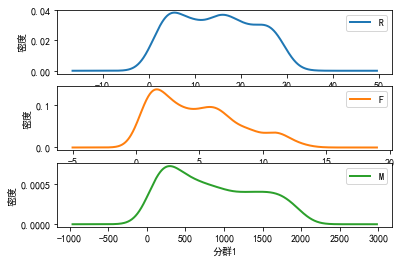

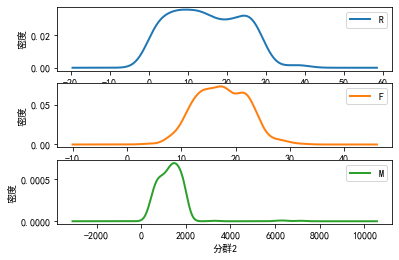

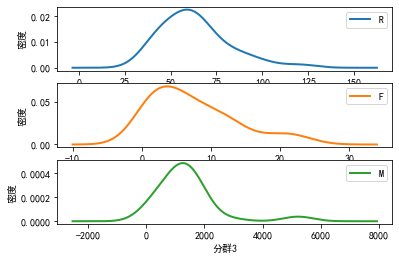

In [4]:
# 分为 k 类，并发数4
model = KMeans(n_clusters=k, n_jobs=4, max_iter=iteration)
# 开始聚类
model.fit(data_zs)
# 统计各个类别的数目
r1 = pd.Series(model.labels_).value_counts()
# 找出聚类中心
r2 = pd.DataFrame(model.cluster_centers_)
# 横向连接（0 是纵向），得到聚类中心对应类别下的数目
r = pd.concat([r2, r1], axis=1)
# 重命名表头
r.columns =list(data.columns) + [u'类别数目']
print(r)
# 详细输出原始数据及其类别
r =pd.concat([data, pd.Series(model.labels_, index=data.index)], axis=1)
# 重命名表头
r.columns = list(data.columns) + [u'聚类类别']
# 保存结果
r.to_excel(outputfile)


# 自定义作图函数
def density_plot(data):
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    p = data.plot(kind='kde', linewidth=2, subplots=True, sharex=False)
    [p[i].set_ylabel(u'密度') for i in range(k)]
    plt.xlabel('分群%s' % (i + 1))
    plt.legend()
    return plt


# 概率密度图文件名前缀
pic_output = 'pd_'
for i in range(k):
    density_plot(data[r[u'聚类类别'] == i]).savefig(u'%s%s.png' % (pic_output, i))